# Construyendo un Bag of Words

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## Leer Dataset

In [2]:
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv("data_lemmatized.csv")
y = df['sentiment']

## Crear conjunto de entrenamiento y pruebas

### variables de salida (listas)
- **x_train**: conjunto de entrenamiento con todas las columnas excepto la que se quiere predecir ('sentiment'). A esas demás columnas se le conocen como 'features' o 'variables'
- **x_test**: conjunto de entrenamiento, solo con la columna que se quiere predecir ('sentiment'). A esa columna se le llama 'labels'
- **y_train**: conjunto de prueba, solo con los 'features'
- **y_test**: conjunto de prueba, solo con los 'labels'
--------------------------------------------------------
### parametros
- **test_size**: porcentaje en que utilizara el conjunto de entrenamiento en todo el dataset
- **random_state**: es la semilla de aleatoridad. Permite revolver las filas y columnas, pero siempre dando el mismo resultado

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df['data_lemmatized'], y, test_size = 0.33, random_state = 53)

## Transformar textos a Vectores de Bag of Words 

### Inicializacion de la clase CountVectorizer
Aplica preprocesamiento removiendo stopwords

.values.astype('U'):
https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

In [4]:
count_vectorizer = CountVectorizer(stop_words='english')

### Fit y Transform

In [5]:
# Conjunto de Entrenamiento
count_train = count_vectorizer.fit_transform(x_train.values.astype('U'))

In [6]:
# Conjunto de pruebas
count_test = count_vectorizer.transform(x_test.values.astype('U'))

In [7]:
print(count_vectorizer.get_feature_names()[:30])

['aa', 'aadavantage', 'aadfw', 'aadv', 'aadvantage', 'aal', 'aand', 'aano', 'aas', 'aaso', 'aaus', 'ab', 'aback', 'abandon', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcdef', 'abcs', 'abduct', 'abilities', 'ability', 'able', 'aboard', 'aboout', 'abound', 'abq', 'abroad', 'absolute']


# Construyendo un TfidfVectorizer

In [8]:
# Importar TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# Inicializar al objeto TfidfVectorizer: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df=0.7)

In [10]:
# Transformar los datos de entrenamiento: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(x_train.values.astype('U'))

# Transformar los datos de prueba: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(x_test.values.astype('U'))

In [11]:
# Imprimir las primeros 10 características
print(tfidf_vectorizer.get_feature_names()[:10])

['aa', 'aadavantage', 'aadfw', 'aadv', 'aadvantage', 'aal', 'aand', 'aano', 'aas', 'aaso']


In [12]:
# Imprimir los primeros 5 vectores de tfidf_train
print(tfidf_train.A[:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.23671055 0.         0.         ... 0.         0.         0.        ]]


# Inspeccionando los vectores (Bag of Words, Tfidf)

In [13]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [14]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [15]:
# Print the head of count_df
print(count_df.head())

   aa  aadavantage  aadfw  aadv  aadvantage  aal  aand  aano  aas  aaso  ...  \
0  0   0            0      0     0           0    0     0     0    0     ...   
1  0   0            0      0     0           0    0     0     0    0     ...   
2  0   0            0      0     0           0    0     0     0    0     ...   
3  0   0            0      0     0           0    0     0     0    0     ...   
4  1   0            0      0     0           0    0     0     0    0     ...   

   yyzua  zabsonre  zambia  zero  zip  zipper  zone  zoom  zurich  zurichnew  
0  0      0         0       0     0    0       0     0     0       0          
1  0      0         0       0     0    0       0     0     0       0          
2  0      0         0       0     0    0       0     0     0       0          
3  0      0         0       0     0    0       0     0     0       0          
4  0      0         0       0     0    0       0     0     0       0          

[5 rows x 7513 columns]


In [16]:
# Print the head of tfidf_df
print(tfidf_df.head())

         aa  aadavantage  aadfw  aadv  aadvantage  aal  aand  aano  aas  aaso  \
0  0.000000  0.0          0.0    0.0   0.0         0.0  0.0   0.0   0.0  0.0    
1  0.000000  0.0          0.0    0.0   0.0         0.0  0.0   0.0   0.0  0.0    
2  0.000000  0.0          0.0    0.0   0.0         0.0  0.0   0.0   0.0  0.0    
3  0.000000  0.0          0.0    0.0   0.0         0.0  0.0   0.0   0.0  0.0    
4  0.236711  0.0          0.0    0.0   0.0         0.0  0.0   0.0   0.0  0.0    

   ...  yyzua  zabsonre  zambia  zero  zip  zipper  zone  zoom  zurich  \
0  ...  0.0    0.0       0.0     0.0   0.0  0.0     0.0   0.0   0.0      
1  ...  0.0    0.0       0.0     0.0   0.0  0.0     0.0   0.0   0.0      
2  ...  0.0    0.0       0.0     0.0   0.0  0.0     0.0   0.0   0.0      
3  ...  0.0    0.0       0.0     0.0   0.0  0.0     0.0   0.0   0.0      
4  ...  0.0    0.0       0.0     0.0   0.0  0.0     0.0   0.0   0.0      

   zurichnew  
0  0.0        
1  0.0        
2  0.0        
3  0.0  

In [17]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [18]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


# Training and testing a classification model with Scikit-learn (Naive Bayes)

## Bag of Words

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report 
nb_classifier = MultinomialNB()

In [60]:
nb_classifier.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
pred =  nb_classifier.predict(count_test)

In [64]:
score = metrics.classification_report(y_test, pred)
print(score)

              precision    recall  f1-score   support

          -1       0.76      0.94      0.84      3037
           0       0.65      0.34      0.45      1031
           1       0.76      0.54      0.63       764

    accuracy                           0.75      4832
   macro avg       0.72      0.61      0.64      4832
weighted avg       0.74      0.75      0.72      4832



In [63]:
metrics.confusion_matrix(y_test, pred)

array([[2863,  118,   56],
       [ 610,  350,   71],
       [ 281,   74,  409]], dtype=int64)

## Tf-idf Vectorizer

In [65]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

In [66]:
# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

In [68]:
# Calculate the accuracy score: score
score = metrics.classification_report(y_test, pred)
print(score)

              precision    recall  f1-score   support

          -1       0.68      0.99      0.81      3037
           0       0.75      0.15      0.25      1031
           1       0.85      0.22      0.35       764

    accuracy                           0.69      4832
   macro avg       0.76      0.46      0.47      4832
weighted avg       0.72      0.69      0.62      4832



In [28]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[3010   21    6]
 [ 850  157   24]
 [ 561   32  171]]


# Improving the model with Tf-idf

In [29]:
# Create the list of alphas: alphas
alphas = np.arange(start = 0, stop = 1, step = 0.1)

In [30]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [31]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.722682119205298

Alpha:  0.1
Score:  0.7363410596026491

Alpha:  0.2
Score:  0.7373758278145696

Alpha:  0.30000000000000004
Score:  0.7313741721854304

Alpha:  0.4
Score:  0.7259933774834437

Alpha:  0.5
Score:  0.7175082781456954

Alpha:  0.6000000000000001
Score:  0.7117135761589404

Alpha:  0.7000000000000001
Score:  0.7067466887417219

Alpha:  0.8
Score:  0.7009519867549668

Alpha:  0.9
Score:  0.6959850993377483



C:\Users\GIYELI\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Alpha = 0.1 dio los mejores resultados

## Inspeccionando el Modelo

In [32]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

In [33]:
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

In [34]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

In [35]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

-1 [(-10.064819950644623, 'aadavantage'), (-10.064819950644623, 'aadfw'), (-10.064819950644623, 'ab'), (-10.064819950644623, 'abassinet'), (-10.064819950644623, 'abbreve'), (-10.064819950644623, 'abcdef'), (-10.064819950644623, 'abduct'), (-10.064819950644623, 'absoulutely'), (-10.064819950644623, 'absurdly'), (-10.064819950644623, 'abundance'), (-10.064819950644623, 'acces'), (-10.064819950644623, 'accidentally'), (-10.064819950644623, 'accidents'), (-10.064819950644623, 'accomidating'), (-10.064819950644623, 'accompaniments'), (-10.064819950644623, 'accumulation'), (-10.064819950644623, 'activitiesprevention'), (-10.064819950644623, 'acu'), (-10.064819950644623, 'adapt'), (-10.064819950644623, 'addl')]


In [36]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

0 [(-5.765113491542951, 'say'), (-5.749199228280537, 'phone'), (-5.737797879633019, 'fly'), (-5.729278730640907, 'tell'), (-5.683779453627749, 'need'), (-5.671328525962622, 'plane'), (-5.642023802634073, 'flightled'), (-5.6153583852471405, 'try'), (-5.604893663075322, 'hour'), (-5.478420967711116, 'customer'), (-5.413142502327905, 'bag'), (-5.380728056063614, 'help'), (-5.338866722610818, 'time'), (-5.334363123287932, 'wait'), (-5.325225609498344, 'hours'), (-5.290463318429618, 'service'), (-5.25088721504438, 'hold'), (-5.149358785851589, 'delay'), (-5.130583024648313, 'cancel'), (-4.2269884343363815, 'flight')]


In [37]:
# Print the second class label and the middle 20 feat_with_weights entries
print(class_labels[2], feat_with_weights[20:40])

1 [(-10.064819950644623, 'adjust'), (-10.064819950644623, 'admiral'), (-10.064819950644623, 'adolfo'), (-10.064819950644623, 'adore'), (-10.064819950644623, 'adult'), (-10.064819950644623, 'adventure'), (-10.064819950644623, 'advisories'), (-10.064819950644623, 'aeroport'), (-10.064819950644623, 'affordable'), (-10.064819950644623, 'afiliates'), (-10.064819950644623, 'african'), (-10.064819950644623, 'afterall'), (-10.064819950644623, 'agentsno'), (-10.064819950644623, 'agentwhats'), (-10.064819950644623, 'agt'), (-10.064819950644623, 'aha'), (-10.064819950644623, 'ahah'), (-10.064819950644623, 'aiecraft'), (-10.064819950644623, 'ail'), (-10.064819950644623, 'airfares')]


# Tratando las Clases Desbalanceadas

## Analisis de Sesgo

Se analizaran la cantidad que se tiene de cada sentimiento en todo el dataset

### El dataset tiene sesgo

In [38]:
y.value_counts()

-1    9178
 0    3099
 1    2363
Name: sentiment, dtype: int64

### Por lo tanto, el conjunto de entrenamiento tambien

In [39]:
y_train.value_counts()

-1    6141
 0    2068
 1    1599
Name: sentiment, dtype: int64

## Técnica de Over-sampling: SMOTE

A diferencia de ROS, SMOTE no crea copias exactas de las observaciones, sino que crea nuevas muestras sintéticas que son bastante similares a las observaciones existentes en la clase minoritaria. Por lo tanto, SMOTE es un poco más sofisticado que simplemente copiar observaciones

In [131]:
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE(kind='regular')

In [132]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(count_df.to_numpy(), y_train.to_numpy())

In [133]:
print(pd.value_counts(pd.Series(y_resampled)))

-1    6141
 1    6141
 0    6141
dtype: int64


In [134]:
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit to the training data
nb_classifier.fit(X_resampled, y_resampled)

# Predict the labels: pred
pred = nb_classifier.predict(count_test)

# Compute accuracy: score
from sklearn.metrics import classification_report 
score = classification_report(y_test, pred)
print(score)
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

          -1       0.82      0.88      0.85      3037
           0       0.59      0.49      0.54      1031
           1       0.68      0.65      0.67       764

    accuracy                           0.76      4832
   macro avg       0.70      0.67      0.69      4832
weighted avg       0.75      0.76      0.76      4832

[[2684  233  120]
 [ 417  505  109]
 [ 154  113  497]]


## Técnica de Under-sampling: NearMiss 

In [135]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

In [136]:
X_train_miss, y_train_miss = nr.fit_sample(count_df.to_numpy(), y_train.to_numpy()) 

In [137]:
print(pd.value_counts(pd.Series(y_train_miss)))

-1    1599
 1    1599
 0    1599
dtype: int64


In [138]:
# Instantiate the classifier: nb_clasifier
nb_classifier = MultinomialNB()

# Fit to the training data
nb_classifier.fit(X_train_miss, y_train_miss)

# Predict the labels: pred
pred = nb_classifier.predict(count_test)

# Compute accuracy: score
from sklearn.metrics import classification_report 
score = classification_report(y_test, pred)
print(score)
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

          -1       0.89      0.66      0.76      3037
           0       0.47      0.57      0.51      1031
           1       0.47      0.80      0.59       764

    accuracy                           0.67      4832
   macro avg       0.61      0.68      0.62      4832
weighted avg       0.73      0.67      0.68      4832

[[2015  579  443]
 [ 199  591  241]
 [  56   98  610]]


## En conclusión, la técnica SMOTE fue mejor en general

# Otras Métricas

## ROC Curve para Multiclases

Para calcular la curva ROC en multiclases, necesitas dos cosas:
- Realizar una prediccion que devuelva probabilidades
- Binarizar las clases con el esquema "Uno vs todos"

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [122]:
# Binarizando las clases
y = label_binarize(y_test, classes=[-1, 0, 1])
n_classes = y.shape[1]

In [123]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(MultinomialNB())
# Instantiate the classifier: nb_clasifier
y_score = classifier.fit(X_resampled, y_resampled).predict_proba(count_test)
#y_pred_prob = nb_classifier.predict_proba(count_test)

In [124]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [125]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

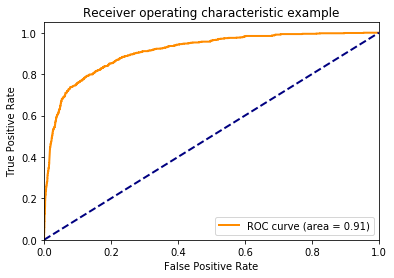

In [127]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

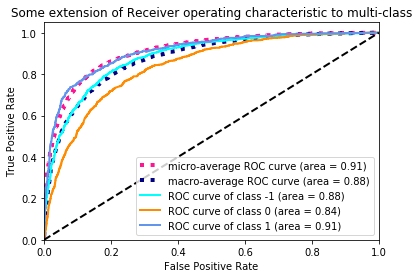

In [130]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i-1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## F1 Score

In [ ]:
from sklearn.metrics import f1_score
# Print the F1 score
#print(f1_score(count_test, y_pred))